# Notebook to visualize the location of Starbucks

In [1]:
# to easily parse csv's
import csv

In [2]:
# count the number of Starbucks in DC
with open('starbucks.csv') as file:
    csvinput = csv.reader(file)

    acc = 0
    for record in csvinput:
        if 'DC' in record[1]:
            acc += 1
        
print( acc )

53


In [3]:
def get_locations(csv_iterator):
    """ strip out long/lat and convert to a lit of floating point 2-tuples """
    return [ ( float(row[2]), float(row[3]) ) for row in csv_iterator ]

In [4]:
# get the data from all locations

with open('starbucks.csv', newline='') as input_file:
    csvinput = csv.reader(input_file, delimiter=',')
    location_data = get_locations(csvinput)

In [5]:
# look at the first few (10) data points
for n in range(10):
    print( location_data[n] )

(-159.3963, 21.97066)
(-158.0274, 21.34273)
(-158.012, 21.46285)
(-158.0061, 21.40369)
(-157.9313, 21.37066)
(-157.9148, 21.33524)
(-157.8615, 21.30846)
(-157.8609, 21.30759)
(-157.8471, 21.29308)
(-157.8326, 21.27913)


In [6]:
# splat / zip to extract lat/long as sep. lists
latitudes, longitudes = zip(*location_data)

In [7]:
# a common, powerful plotting library
import matplotlib.pyplot as plt

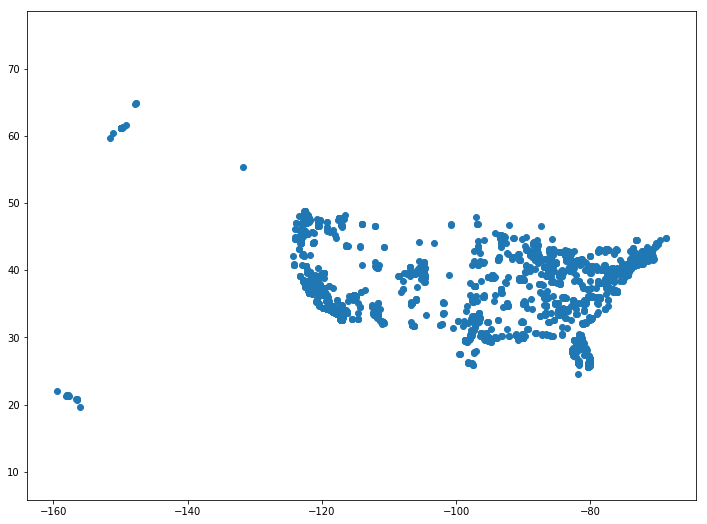

In [8]:
# set figure size
plt.figure(figsize=(12, 9))

# get the axes of the plot and set them to be equal-aspect and limited by data
ax = plt.axes()
ax.set_aspect('equal', 'datalim')

# plot the data
plt.scatter(latitudes,longitudes)

# jupyter automatically plots this inline. On the console, you need to invoke plt.show()
# FYI: In that case, execution halts until you close the window it opens.

In [9]:
def get_locations_in(csv_iterator,state):
    """ strip out long/lat and convert to a lit of floating point 2-tuples --
        only for those in a specified state """
    return [ ( float(row[2]), float(row[3])) 
            for row in csv_iterator if state in row[1]]

In [10]:
# get the starbucks in DC
with open('starbucks.csv', newline='') as input_file:
    csvinput = csv.reader(input_file, delimiter=',')
    location_data_dc = get_locations_in(csvinput,"DC")

In [11]:
# show the first 10 locations:
for n in range(10):
    print( location_data_dc[n] )

(-77.10246, 38.92601)
(-77.09531, 38.94449)
(-77.08577, 38.93345)
(-77.08513, 38.95964)
(-77.07969, 38.94827)
(-77.07443, 38.96306)
(-77.07294, 38.93547)
(-77.07161, 38.92054)
(-77.06769, 38.91552)
(-77.06153, 38.90519)


In [12]:
# as before, strip lat/long from a list of 2-tuples into 2 lists
latitudes_dc, longitudes_dc = zip(*location_data_dc)

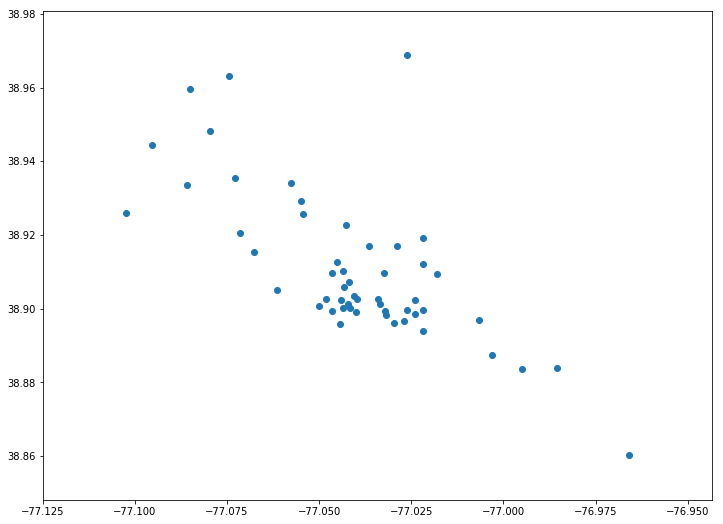

In [13]:
# set figure size
plt.figure(figsize=(12, 9))

# get the axes of the plot and set them to be equal-aspect and limited by data
ax = plt.axes()
ax.set_aspect('equal', 'datalim')

# plot the data
plt.scatter(latitudes_dc,longitudes_dc)

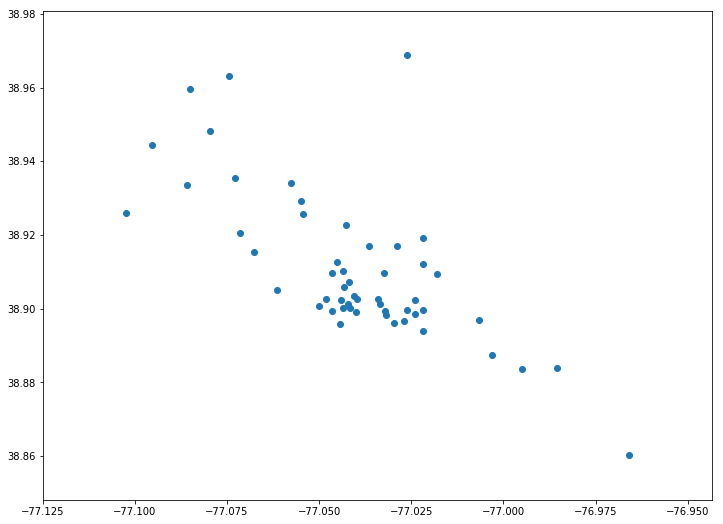

In [14]:
# Note that we can also use the splat operator to fill in the arguments for the scatter plot
# Then we don't need to name the lat/long lists

# setup
plt.figure(figsize=(12, 9))
ax = plt.axes()
ax.set_aspect('equal', 'datalim')

# the "compressed" expression
plt.scatter(*zip(*location_data_dc))

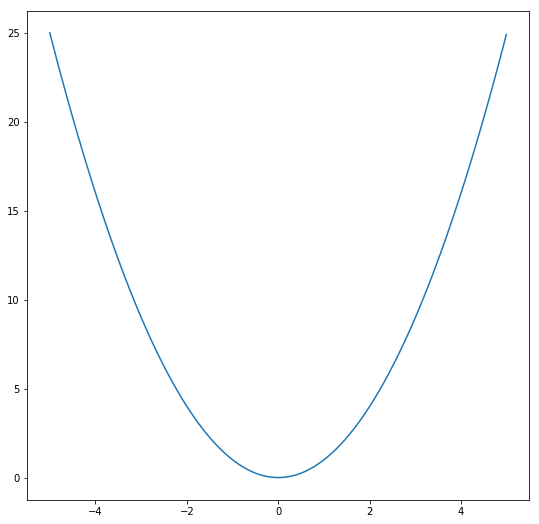

In [15]:
# matplotlib can also be used to plot line-style graphs
# the code below graphs the quadratic function y=x**2

# numpy = numerical python. A must-use package for heavy computations
import numpy as np

plt.figure(figsize=(9, 9))

# create the array [-5.0,-4.99,-4.98,-4.97,...,4.99]
X = np.arange(-5.0, 5.0, 0.01)

# numpy supports "broadcasting" i.e. applying the operation to every element of the array
# the code creates a new np.array Y where values are the squares of the values in X
Y = X**2

line, = plt.plot(X, Y)
plt.show()

In [16]:
# We also want to plot the DC boundaries, so we have a better idea where these things are
# the data is contained in DC.txt

# let's inspect it. Observe the format
with open('DC.txt') as file:
    for line in file:
        print(line,end='') # line's aready end with a newline do don't print another

 -77.120201   38.791401
 -76.909706   38.994400
1

District of Columbia
DC
25
 -77.120201   38.934200
 -77.042305   38.994400
 -77.036400   38.991402
 -77.008301   38.969601
 -76.909706   38.892700
 -77.038902   38.791401
 -77.036102   38.814800
 -77.040703   38.821602
 -77.039505   38.832100
 -77.045197   38.834599
 -77.046303   38.841202
 -77.033104   38.841599
 -77.031998   38.850399
 -77.038101   38.861801
 -77.042908   38.863400
 -77.039200   38.865700
 -77.040901   38.871101
 -77.045708   38.875099
 -77.046600   38.871201
 -77.049400   38.870602
 -77.054398   38.879002
 -77.058556   38.879955
 -77.068504   38.899700
 -77.090508   38.904099
 -77.101501   38.910999



In [17]:
with open('DC.txt') as file:
    # get the lower left and upper right coords for the bounding box
    ll_long, ll_lat = map(float, next(file).split())
    ur_long, ur_lat = map(float, next(file).split())
    # get the number of regions 
    num_records = int(next(file))
    # there better just be one
    assert num_records == 1
    # then a blank line
    next(file)
    # Title of "county"
    county_name = next(file).rstrip() # removes newline at end
    # "State" county resides in
    state_name = next(file).rstrip()
    # this is supposed to be DC
    assert state_name == "DC"
    # number of points to expect
    num_pairs = int(next(file))
    dc_boundary = [ tuple(map(float,next(file).split())) for n in range(num_pairs)]
    


In [18]:
dc_boundary

[(-77.120201, 38.9342),
 (-77.042305, 38.9944),
 (-77.0364, 38.991402),
 (-77.008301, 38.969601),
 (-76.909706, 38.8927),
 (-77.038902, 38.791401),
 (-77.036102, 38.8148),
 (-77.040703, 38.821602),
 (-77.039505, 38.8321),
 (-77.045197, 38.834599),
 (-77.046303, 38.841202),
 (-77.033104, 38.841599),
 (-77.031998, 38.850399),
 (-77.038101, 38.861801),
 (-77.042908, 38.8634),
 (-77.0392, 38.8657),
 (-77.040901, 38.871101),
 (-77.045708, 38.875099),
 (-77.0466, 38.871201),
 (-77.0494, 38.870602),
 (-77.054398, 38.879002),
 (-77.058556, 38.879955),
 (-77.068504, 38.8997),
 (-77.090508, 38.904099),
 (-77.101501, 38.910999)]

In [19]:
# add the beginning to the end so that it closes up
dc_boundary.append(dc_boundary[0])

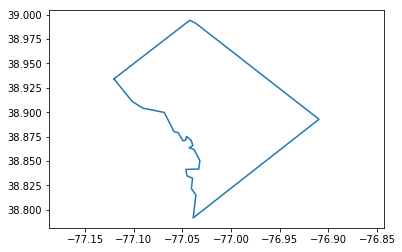

In [20]:
# draw it!

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.plot(*zip(*dc_boundary))

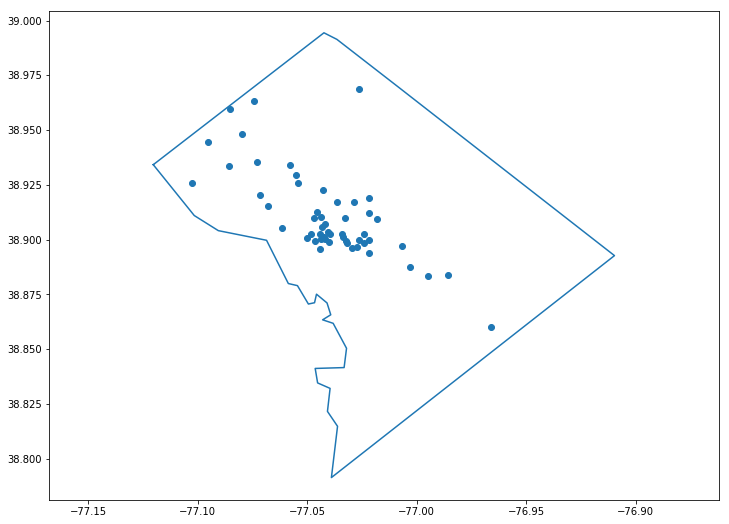

In [21]:
# draw both the starbucks location and DC boundary together

plt.figure(figsize=(12, 9))

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.scatter(*zip(*location_data_dc))
plt.plot(*zip(*dc_boundary))

### But where's AU?

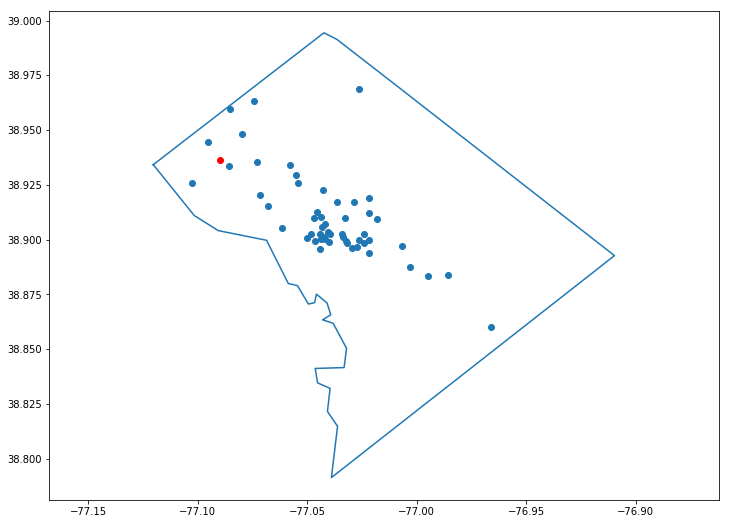

In [22]:
# draw both the starbucks location and DC boundary together

plt.figure(figsize=(12, 9))

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.scatter(*zip(*location_data_dc))
plt.plot(*zip(*dc_boundary))

# add a red dot right over Anderson
plt.scatter([-77.0897511],[38.9363019],color='red')